In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
import copy
%matplotlib inline

/home/server2080ti/Desktop/Adv/Util.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)


In [2]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 500 #Query Budgets
random.seed(42) #Set random seeds

refrigerator: 0.97819203
rotisserie: 0.019830398
plate_rack: 0.0009788951
microwave: 0.00050209794
dishwasher: 0.00029562737
china_cabinet: 5.5389362e-05


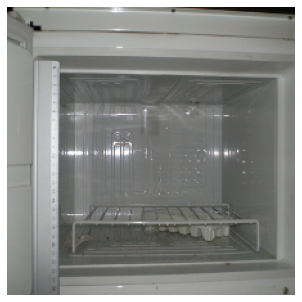

In [3]:
#Select random target image
oriImg= randomimg(mode = attackMode)
display_images(oriImg.img)

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:5.743911266326904, Linf:0.01568630337715149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


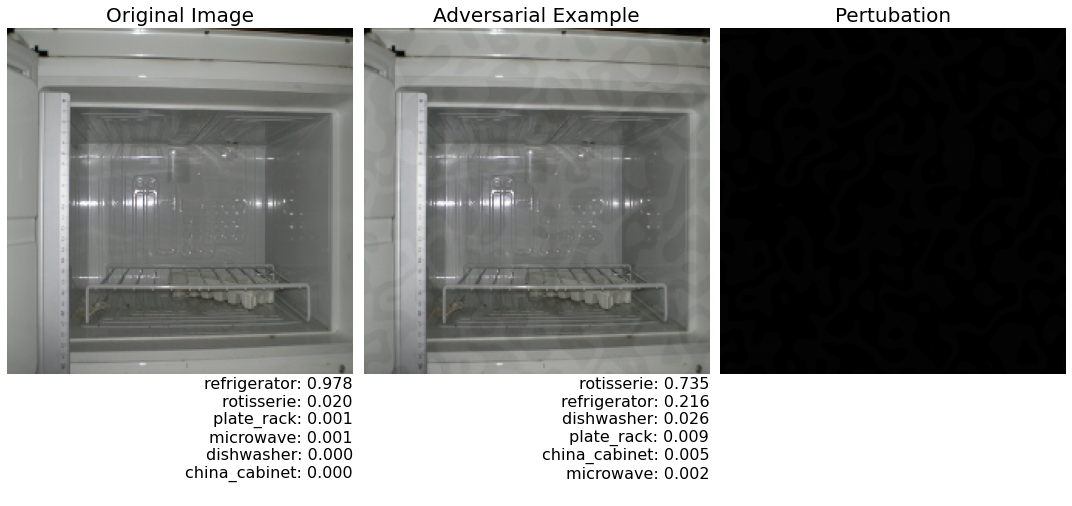

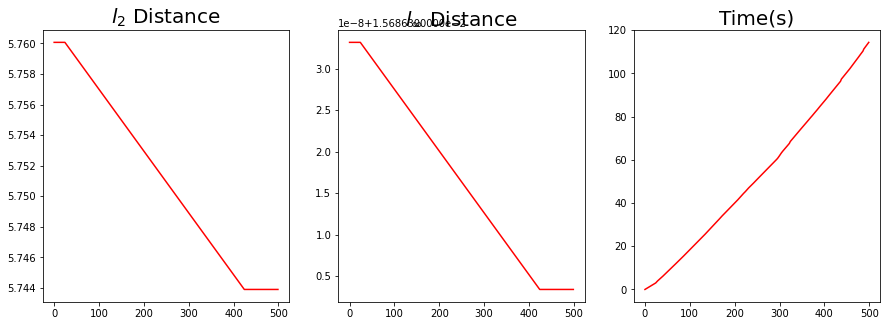

In [4]:
#BO-DBA attack
noiseGenerator = 'perlin'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack(oriImg_copy,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:17.303850173950195, Linf:0.0627450942993164


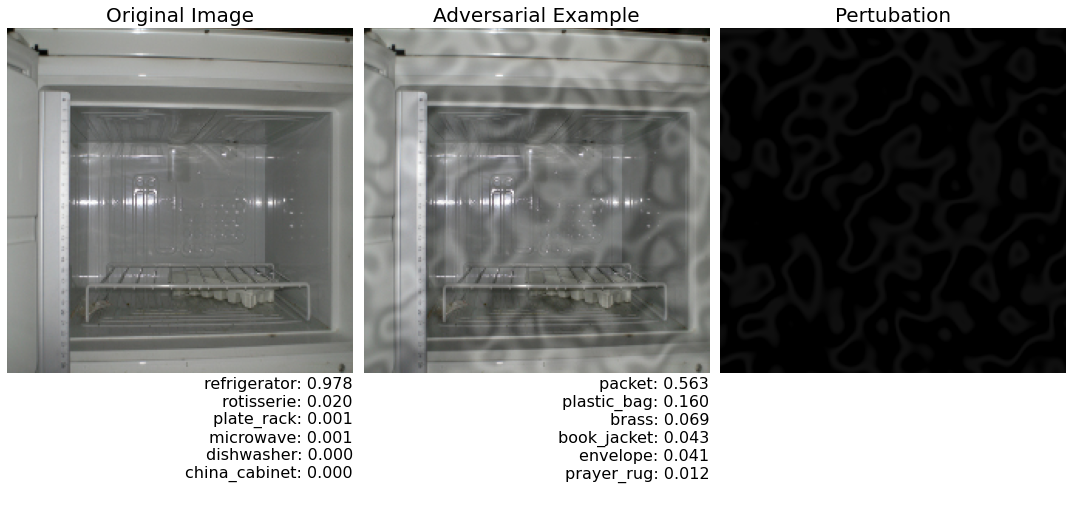

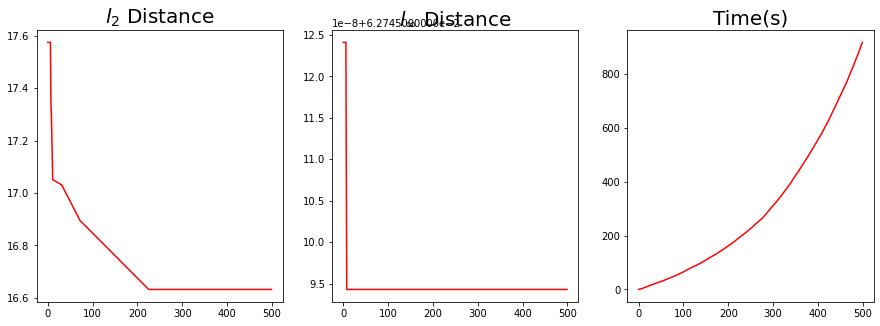

In [5]:
#Procedural attack
#Notes that the computation cost of Procedural attack is very high.
noiseGenerator = 'perlin'#Options: perlin; gabor;
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack_Score(oriImg_copy, max_query=queryBudgets,
                                                                   noise=noiseGenerator)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)



  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:10.229680061340332, Linf:0.03137257695198059


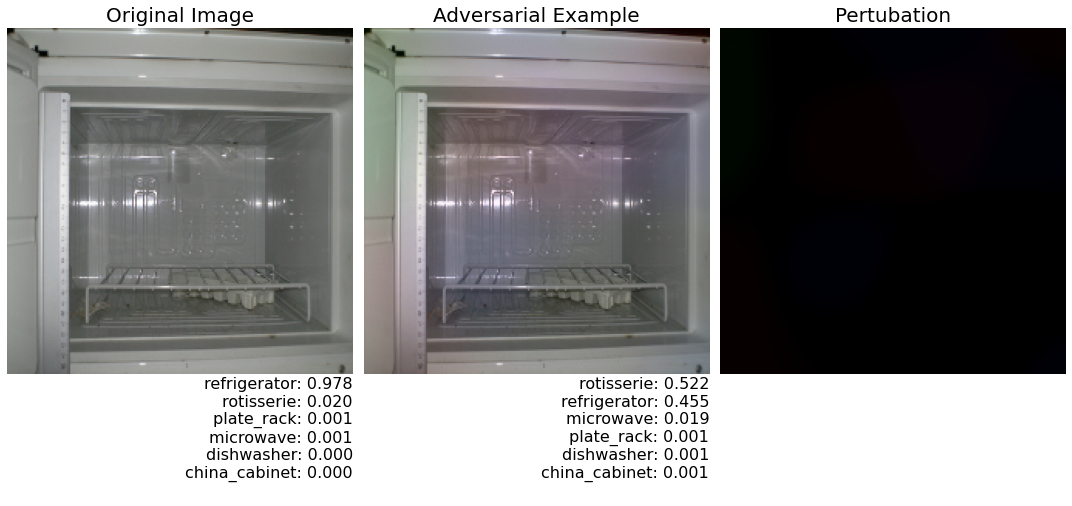

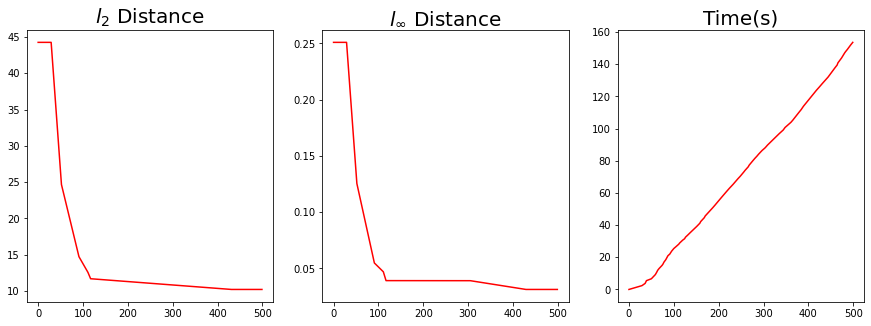

In [6]:
#BO-DBA attack with BICU
noiseGenerator = 'BICU'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack(oriImg_copy,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:11.250399589538574, Linf:0.0627450942993164


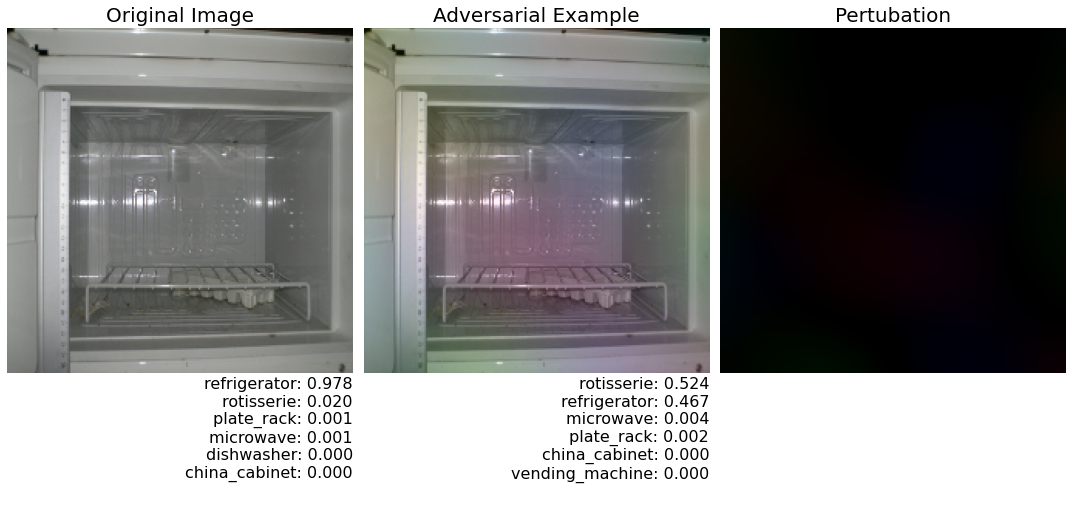

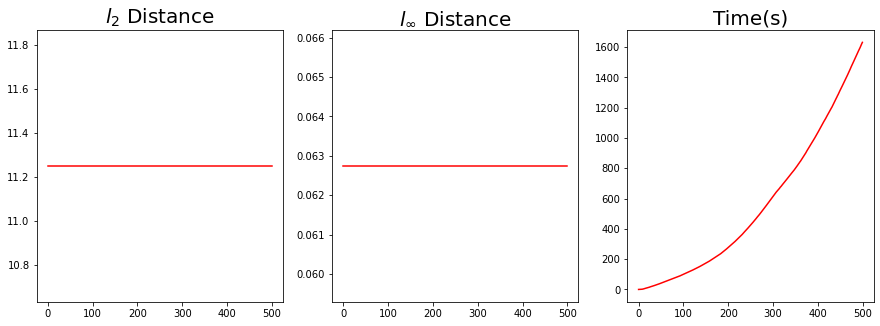

In [7]:
#BayesOPT attack
#Notes that the computation cost of BayesOPT attack is very high.
noiseGenerator = 'BICU'#Options: BICU; BILI; NN; CLUSTER
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack_Score(oriImg_copy, max_query=queryBudgets,
                                                                   noise=noiseGenerator)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)


  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:16.794874499350968, Linf:0.04418271780014038


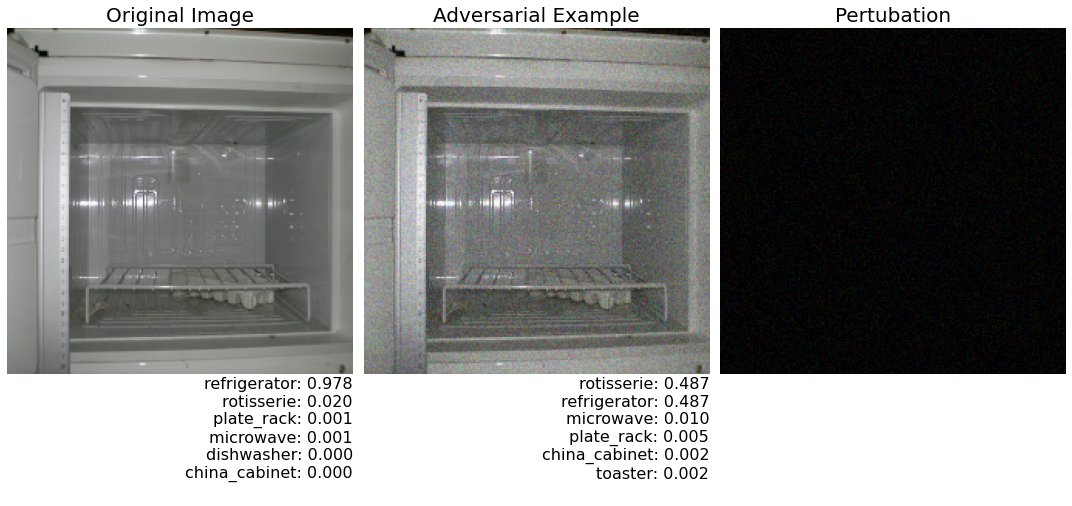

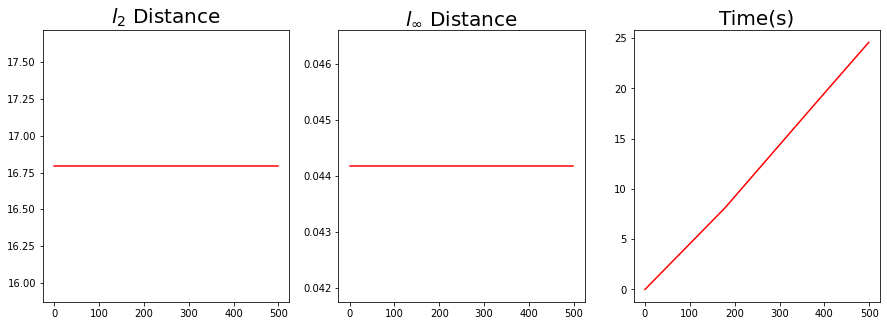

In [4]:
#HJSA attack

constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = hsja(oriImg_copy,constraint=constraint,
                                                  max_query=queryBudgets,verbose=False)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack sucess: True, L2:11.439961433410645, Linf:0.11692154407501221


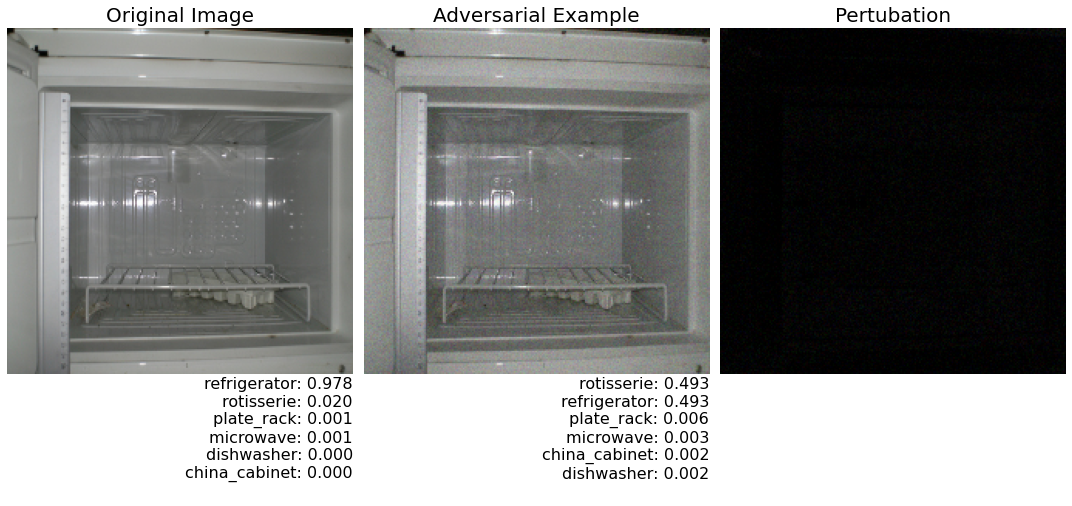

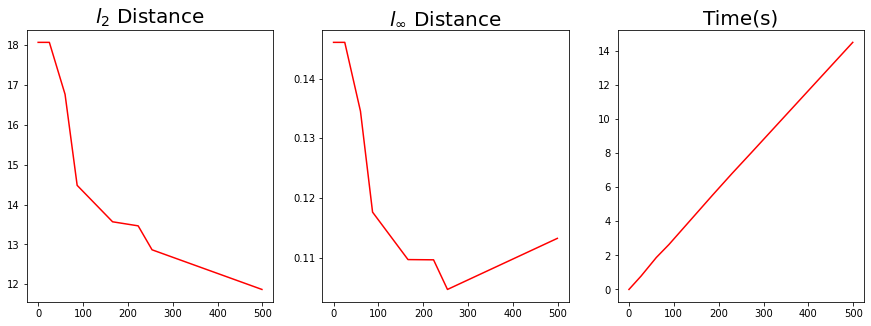

In [5]:
#Query attack
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result =  attack_untargeted(imgobj=oriImg_copy, alpha = 0.2, 
                                                                beta = 0.001, max_query=queryBudgets)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)